# Data Description 

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [27]:
data = pd.read_csv("Star.csv")

In [28]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [30]:
data.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [31]:
data["SpType"].value_counts()

SpType
K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: count, Length: 584, dtype: int64

# Null values Detection

In [32]:
data.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

# Outliers Detection and Treatment

Vmag              Axes(0.125,0.798085;0.133621x0.0819149)
Plx            Axes(0.285345,0.798085;0.133621x0.0819149)
e_Plx           Axes(0.44569,0.798085;0.133621x0.0819149)
B-V            Axes(0.606034,0.798085;0.133621x0.0819149)
Amag           Axes(0.766379,0.798085;0.133621x0.0819149)
TargetClass       Axes(0.125,0.699787;0.133621x0.0819149)
dtype: object

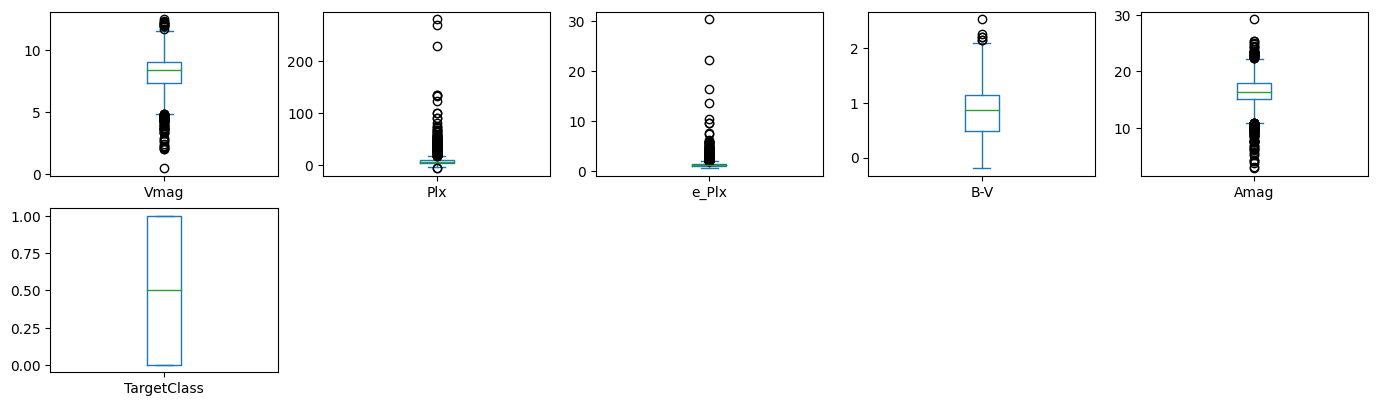

In [33]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [34]:
data=data[data['Vmag']<data['Vmag'].quantile(0.9)]
data=data[data['Plx']<data['Plx'].quantile(0.9)]
data=data[data['e_Plx']<data['e_Plx'].quantile(0.9)]
data=data[data['B-V']<data['B-V'].quantile(0.9)]
data=data[data['Amag']<data['Amag'].quantile(0.9)]

Vmag              Axes(0.125,0.798085;0.133621x0.0819149)
Plx            Axes(0.285345,0.798085;0.133621x0.0819149)
e_Plx           Axes(0.44569,0.798085;0.133621x0.0819149)
B-V            Axes(0.606034,0.798085;0.133621x0.0819149)
Amag           Axes(0.766379,0.798085;0.133621x0.0819149)
TargetClass       Axes(0.125,0.699787;0.133621x0.0819149)
dtype: object

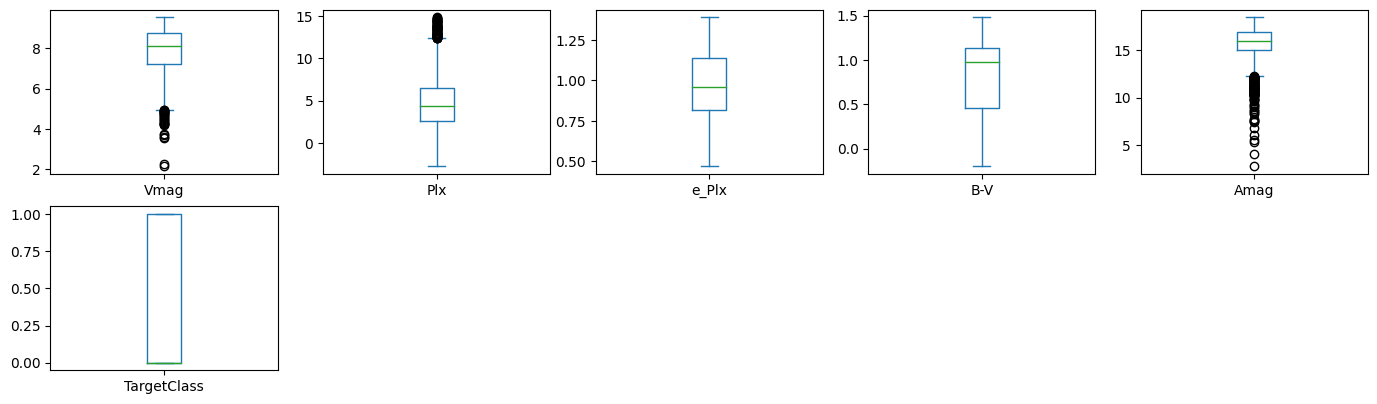

In [35]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [36]:
data.shape

(2138, 7)

In [37]:
SpType_le = LabelEncoder()  
data['SpType'] = SpType_le.fit_transform(data["SpType"])

# Data Visualization

Text(0.5, 0, 'Absolute Magnitude')

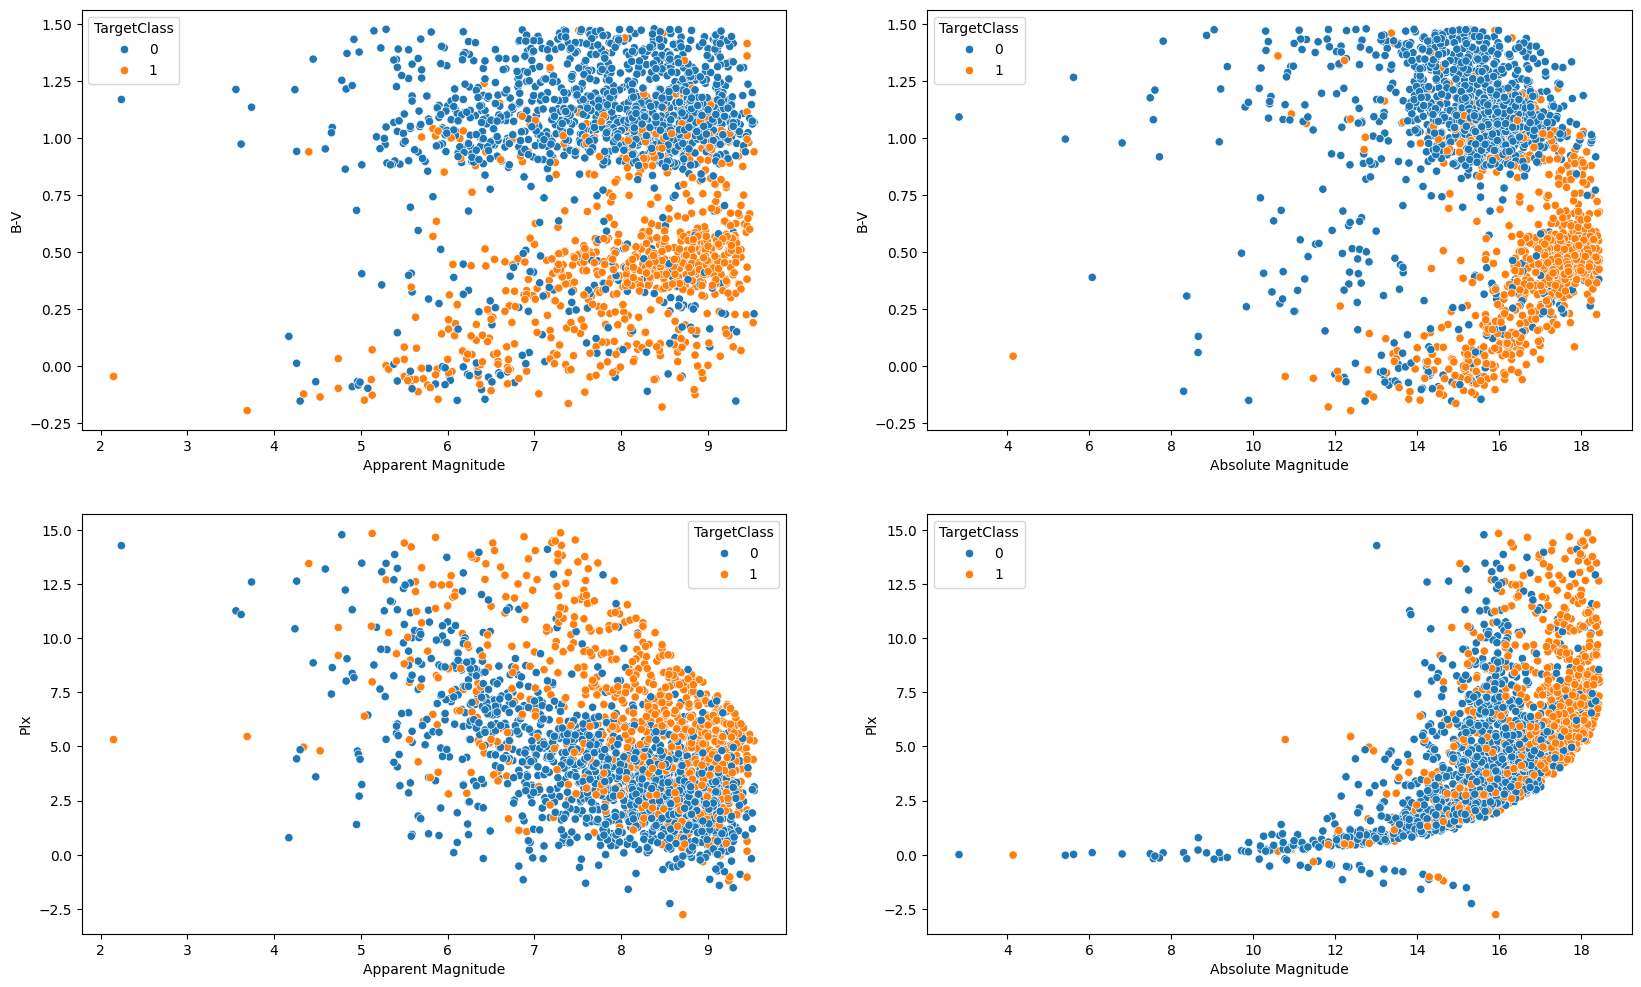

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))

sns.scatterplot(data = data , x = 'Vmag', y= 'B-V', ax = axes[0][0], hue = 'TargetClass')
axes[0,0].set_xlabel('Apparent Magnitude')

sns.scatterplot(data = data , x = 'Amag',  y= 'B-V', ax = axes[0][1], hue = 'TargetClass')
axes[0,1].set_xlabel('Absolute Magnitude')


sns.scatterplot(data = data, x = 'Vmag', y = 'Plx', ax = axes[1][0], hue='TargetClass')
axes[1,0].set_xlabel('Apparent Magnitude')


sns.scatterplot(data = data, x = 'Amag', y = 'Plx', ax = axes[1][1], hue = 'TargetClass')
axes[1,1].set_xlabel('Absolute Magnitude')

Text(0.5, 0, 'Apparent Magnitude')

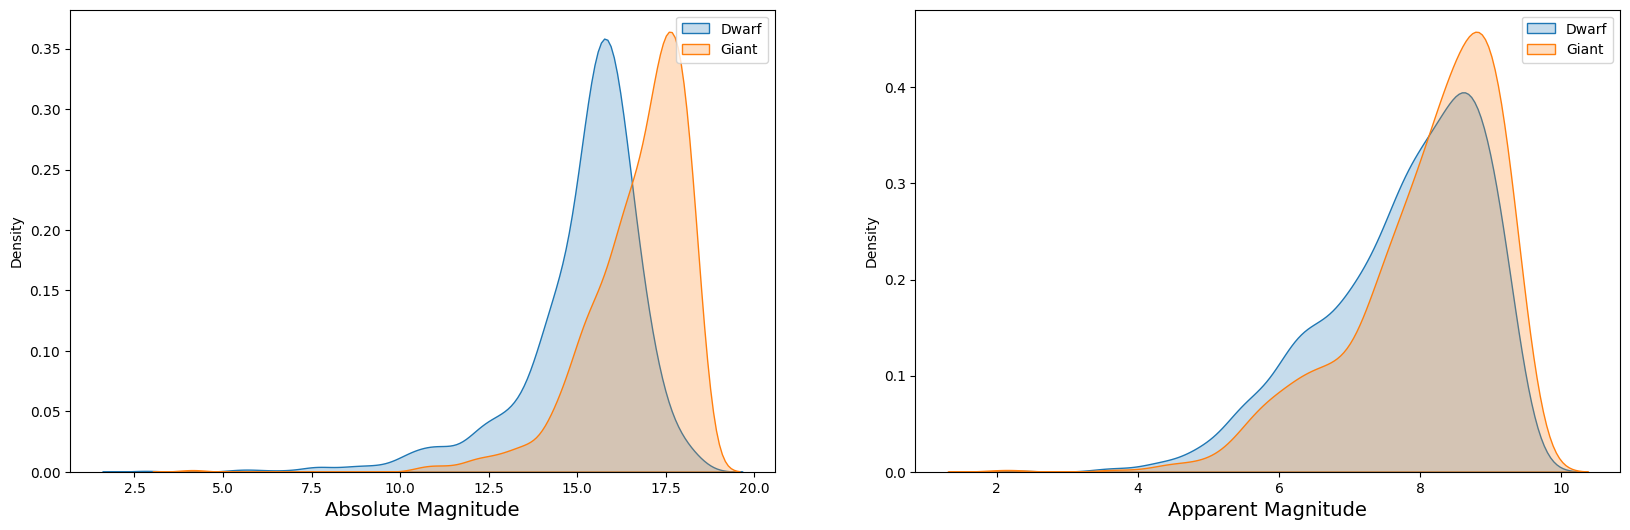

In [39]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

sns.kdeplot(data = data['Amag'].loc[data['TargetClass']==0], shade=True, ax = axes[0],label='Dwarf')
sns.kdeplot(data = data['Amag'].loc[data['TargetClass']==1], shade=True, ax = axes[0],label='Giant')
axes[0].legend()

axes[0].set_xlabel('Absolute Magnitude', size=14)
sns.kdeplot(data = data['Vmag'].loc[data['TargetClass']==0], shade=True, ax = axes[1],label='Dwarf')
sns.kdeplot(data = data['Vmag'].loc[data['TargetClass']==1], shade=True, ax = axes[1],label='Giant')
axes[1].legend()

axes[1].set_xlabel('Apparent Magnitude', size=14)

# Split the data

In [40]:
x = data.drop("TargetClass", axis = 1).values
y = data['TargetClass'].values 

In [41]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [42]:
x_train.shape

(1603, 6)

# Logistic Regression

In [43]:
lr = LogisticRegression(C = 200)

In [44]:
lr.fit(x_train , y_train)

LogisticRegression(C=200)

In [45]:
lr.score(x_train , y_train)

0.8702432938240798

In [46]:
lr.score(x_test , y_test)

0.891588785046729

# KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [49]:
knn.score(x_train , y_train)

0.9307548346849657

In [50]:
knn.score(x_test , y_test)

0.9102803738317757

# Decision Tree

In [51]:
dt =DecisionTreeClassifier(max_features=6 ,    max_depth=10)

In [52]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10, max_features=6)

In [53]:
dt.score(x_train , y_train)

0.9794135995009358

In [54]:
dt.score(x_test , y_test)

0.8990654205607477

# Random Forest

In [55]:
rf = RandomForestClassifier(max_features=6 ,    max_depth=10)

In [56]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.991890205864005

In [57]:
rf.score(x_test , y_test)

0.9252336448598131

# adaboost

In [58]:
ada = AdaBoostClassifier(n_estimators=5, learning_rate=0.2)

In [59]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=5)

In [60]:
ada.score(x_train , y_train )

0.843418590143481

In [61]:
ada.score(x_test , y_test)

0.8448598130841122

# Voting

In [62]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = RandomForestClassifier(n_estimators=3 , max_depth=10  , max_features=6)

In [63]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                   ("RandomForestClassifier" , clf3)] , voting = "hard")

In [64]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=6,
                                                     n_estimators=3))])

In [65]:
v_clf.score(x_train , y_train)

0.9507174048658765

In [66]:
v_clf.score(x_test , y_test)

0.9214953271028037

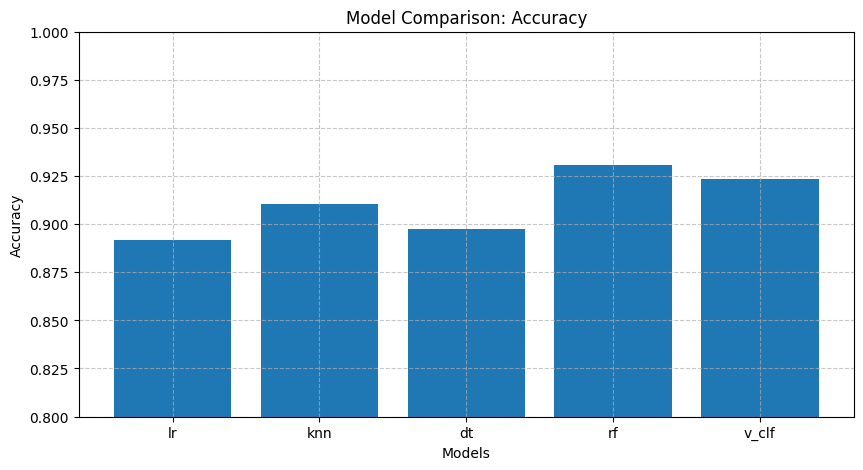

In [67]:
model_names = ['lr', 'knn', 'dt', 'rf','v_clf']
accuracy_scores = [0.891588785046729, 0.9102803738317757, 0.897196261682243, 0.930841121495327, 0.9233644859813084]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()